In [12]:
import pandas as pd
import numpy as np
from urllib2 import urlopen
from bs4 import BeautifulSoup
from requests import get
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

In [2]:
url = "https://www.suara.com/search/pupr/page--1"
html = urlopen(url)

In [3]:
soup = BeautifulSoup(html,'lxml')

In [4]:
suara_container = soup.find_all('div', class_ = 'item-content item-right')

In [5]:
len(suara_container)

20

In [6]:
suara_container[0].h4.a.text

u'Kementerian PUPR Targetkan Bisa Bangun 1,25 Juta Unit Rumah di 2019'

In [7]:
suara_container[0].p.text

u'Kementerian PUPR menaikan target Program Satu Juta Rumah pada tahun 2019.'

In [8]:
pages = [str(i) for i in range(1,320)]

In [9]:
newstitles = []
newsdescriptions = []

In [10]:
start_time = time()
requests = 0

In [22]:
for page in pages:
    # Make a get request
    response = get('https://www.suara.com/search/pupr/page--' + page)
    
    sleep(randint(8,15))
    
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    news_container = soup.find_all('div', class_ = 'item-content item-right')
    
    for news in news_container:
        if news.find('h4', class_='post-title') is not None:
            newstitle = news.a.text
            newstitles.append(newstitle)
            
            newsdesc = news.p.text
            newsdescriptions.append(newsdesc)
    

In [23]:
SuaraNews = pd.DataFrame({"newstitle":newstitles,
                         "newsdesc":newsdescriptions })

In [34]:
SuaraNews

,newsdesc,newstitle,titledesc
0,Presiden Jokowi beserta Ibu Negara mengunjungi...,Jokowi Telepon Menteri PUPR Minta Benteng Van ...,Presiden Jokowi beserta Ibu Negara mengunjungi...
1,Presiden sangat mendukung kegiatan pembangunan...,PUPR Ajak Komunitas Bantu Wujudkan Program Sat...,Presiden sangat mendukung kegiatan pembangunan...
2,"""Kapasitas Michael sebagai saksi diperiksa unt...","Kasus Proyek Air Minum Kementrian PUPR, KPK Pa...","""Kapasitas Michael sebagai saksi diperiksa unt..."
3,"Rusun dilengkapi lift, meubelair, hingga prasa...",TNI Kodam Jaya Telah Tempati Rusun yang Dibang...,"Rusun dilengkapi lift, meubelair, hingga prasa..."
4,PUPR telah menyelesaikan pembangunan lima ruma...,"5 Rusun TNI Dibangun di Jaktim, Kementerian PU...",PUPR telah menyelesaikan pembangunan lima ruma...
5,Kerja sama tersebut merupakan tindak lanjut da...,Kementerian PUPR dan TNI Tingkatkan Kerja Sama...,Kerja sama tersebut merupakan tindak lanjut da...
6,"Menurutnya, sistem pompa tersebut akan menyedo...","Bangun Pompa Sedot di Kali Sentiong, PUPR Siap...","Menurutnya, sistem pompa tersebut akan menyedo..."
7,Sepanjang 2015 sampai 2019 total ada 65 bendun...,Tahun Ini Kementerian PUPR Bangun 9 Bendungan ...,Sepanjang 2015 sampai 2019 total ada 65 bendun...
8,Nivalia akan diperiksa sebagai saksi untuk ter...,"Suap Air Minum di Kementerian PUPR, KPK Periks...",Nivalia akan diperiksa sebagai saksi untuk ter...
9,"Menteri PUPR, Basuki Hadimuljono mengatakan su...",Menteri PUPR Tak Keberatan Motor Masuk Tol,"Menteri PUPR, Basuki Hadimuljono mengatakan su..."


In [29]:
SuaraNews = SuaraNews.drop_duplicates(subset=['newstitle'], keep='first')

In [30]:
SuaraNews['titledesc'] = SuaraNews[['newsdesc', 'newstitle']].apply(lambda x: ' '.join(x), axis=1)



In [40]:
train = SuaraNews.head(610)

In [41]:
train

,newsdesc,newstitle,titledesc
0,Presiden Jokowi beserta Ibu Negara mengunjungi...,Jokowi Telepon Menteri PUPR Minta Benteng Van ...,Presiden Jokowi beserta Ibu Negara mengunjungi...
1,Presiden sangat mendukung kegiatan pembangunan...,PUPR Ajak Komunitas Bantu Wujudkan Program Sat...,Presiden sangat mendukung kegiatan pembangunan...
2,"""Kapasitas Michael sebagai saksi diperiksa unt...","Kasus Proyek Air Minum Kementrian PUPR, KPK Pa...","""Kapasitas Michael sebagai saksi diperiksa unt..."
3,"Rusun dilengkapi lift, meubelair, hingga prasa...",TNI Kodam Jaya Telah Tempati Rusun yang Dibang...,"Rusun dilengkapi lift, meubelair, hingga prasa..."
4,PUPR telah menyelesaikan pembangunan lima ruma...,"5 Rusun TNI Dibangun di Jaktim, Kementerian PU...",PUPR telah menyelesaikan pembangunan lima ruma...
5,Kerja sama tersebut merupakan tindak lanjut da...,Kementerian PUPR dan TNI Tingkatkan Kerja Sama...,Kerja sama tersebut merupakan tindak lanjut da...
6,"Menurutnya, sistem pompa tersebut akan menyedo...","Bangun Pompa Sedot di Kali Sentiong, PUPR Siap...","Menurutnya, sistem pompa tersebut akan menyedo..."
7,Sepanjang 2015 sampai 2019 total ada 65 bendun...,Tahun Ini Kementerian PUPR Bangun 9 Bendungan ...,Sepanjang 2015 sampai 2019 total ada 65 bendun...
8,Nivalia akan diperiksa sebagai saksi untuk ter...,"Suap Air Minum di Kementerian PUPR, KPK Periks...",Nivalia akan diperiksa sebagai saksi untuk ter...
9,"Menteri PUPR, Basuki Hadimuljono mengatakan su...",Menteri PUPR Tak Keberatan Motor Masuk Tol,"Menteri PUPR, Basuki Hadimuljono mengatakan su..."


In [13]:
import csv
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [14]:
train = pd.read_csv('SuaraNews.csv')

In [15]:
train = train.head(610)

In [16]:
train

,Unnamed: 0,newsdesc,newstitle,titledesc
0,0,Presiden Jokowi beserta Ibu Negara mengunjungi...,Jokowi Telepon Menteri PUPR Minta Benteng Van ...,Presiden Jokowi beserta Ibu Negara mengunjungi...
1,1,Presiden sangat mendukung kegiatan pembangunan...,PUPR Ajak Komunitas Bantu Wujudkan Program Sat...,Presiden sangat mendukung kegiatan pembangunan...
2,2,"""Kapasitas Michael sebagai saksi diperiksa unt...","Kasus Proyek Air Minum Kementrian PUPR, KPK Pa...","""Kapasitas Michael sebagai saksi diperiksa unt..."
3,3,"Rusun dilengkapi lift, meubelair, hingga prasa...",TNI Kodam Jaya Telah Tempati Rusun yang Dibang...,"Rusun dilengkapi lift, meubelair, hingga prasa..."
4,4,PUPR telah menyelesaikan pembangunan lima ruma...,"5 Rusun TNI Dibangun di Jaktim, Kementerian PU...",PUPR telah menyelesaikan pembangunan lima ruma...
5,5,Kerja sama tersebut merupakan tindak lanjut da...,Kementerian PUPR dan TNI Tingkatkan Kerja Sama...,Kerja sama tersebut merupakan tindak lanjut da...
6,6,"Menurutnya, sistem pompa tersebut akan menyedo...","Bangun Pompa Sedot di Kali Sentiong, PUPR Siap...","Menurutnya, sistem pompa tersebut akan menyedo..."
7,7,Sepanjang 2015 sampai 2019 total ada 65 bendun...,Tahun Ini Kementerian PUPR Bangun 9 Bendungan ...,Sepanjang 2015 sampai 2019 total ada 65 bendun...
8,8,Nivalia akan diperiksa sebagai saksi untuk ter...,"Suap Air Minum di Kementerian PUPR, KPK Periks...",Nivalia akan diperiksa sebagai saksi untuk ter...
9,9,"Menteri PUPR, Basuki Hadimuljono mengatakan su...",Menteri PUPR Tak Keberatan Motor Masuk Tol,"Menteri PUPR, Basuki Hadimuljono mengatakan su..."


In [17]:
tags_lower = train['titledesc'].str.lower().str.cat(sep = ' ')

In [18]:
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [19]:
stop_words = list(get_stop_words('id'))

In [20]:
nltk_words = list(stopwords.words('indonesian'))

In [21]:
stop_words.extend(nltk_words)

In [22]:
word_tokens_tags = word_tokenize(tags_remove_pun)

In [23]:
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]

In [24]:
filtered_sentence_tags = []

In [25]:
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [26]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [27]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isdigit()]    

In [28]:
top_N = 10000

In [29]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)

In [30]:
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N), columns = ['Word', 'Frequency'])

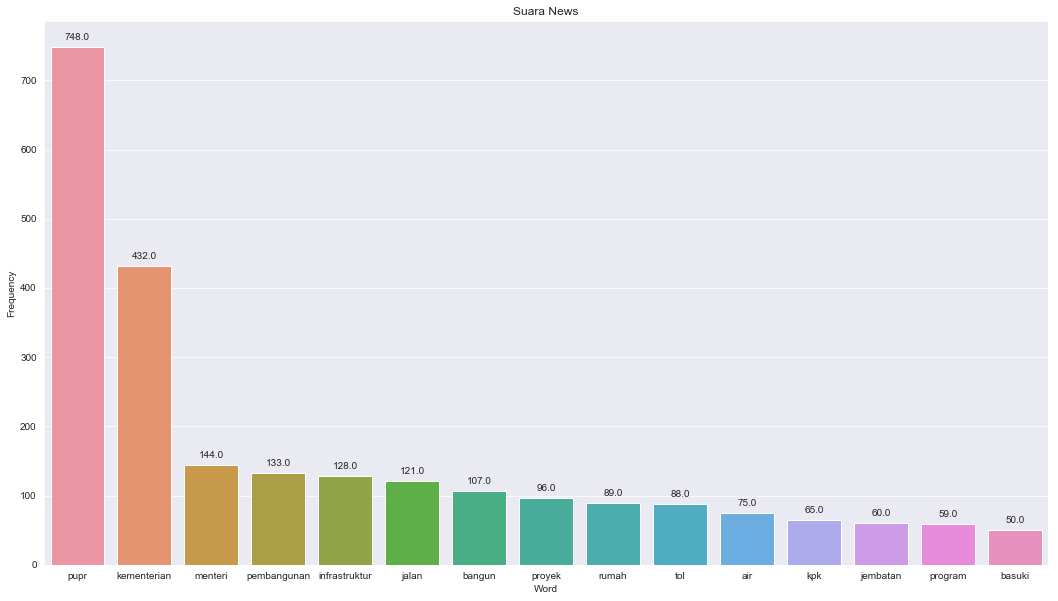

In [31]:
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
plt.title('Suara News')

ax = sns.barplot(x = 'Word', y = 'Frequency', data = rslt_tags.head(15))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [57]:
bloblist_desc = list()

train_descr_str=train['newstitle'].astype(str)
for row in train_descr_str:
    blob = TextBlob(row)
    an = blob.translate(from_lang='id', to='en')
    bloblist_desc.append((row,an.sentiment.polarity, an.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


HTTPError: HTTP Error 503: Service Unavailable

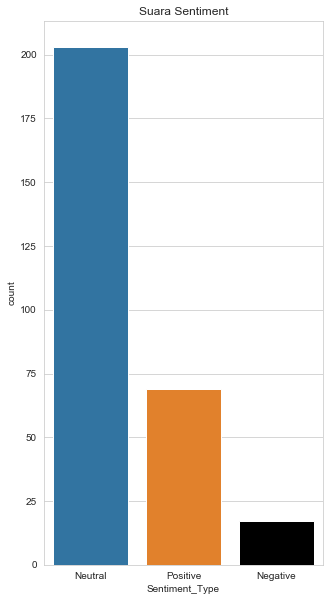

In [61]:
 
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('Suara Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C0", "C1", "k"])


In [59]:
train_polarity_desc.to_csv("suaracomSentiment.csv")

In [60]:
train_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,Jokowi Telepon Menteri PUPR Minta Benteng Van ...,0.000000,0.000000,Neutral
1,PUPR Ajak Komunitas Bantu Wujudkan Program Sat...,0.000000,0.000000,Neutral
2,"Kasus Proyek Air Minum Kementrian PUPR, KPK Pa...",0.000000,0.000000,Neutral
3,TNI Kodam Jaya Telah Tempati Rusun yang Dibang...,0.000000,0.000000,Neutral
4,"5 Rusun TNI Dibangun di Jaktim, Kementerian PU...",0.400000,0.800000,Positive
5,Kementerian PUPR dan TNI Tingkatkan Kerja Sama...,0.000000,0.000000,Neutral
6,"Bangun Pompa Sedot di Kali Sentiong, PUPR Siap...",0.000000,0.000000,Neutral
7,Tahun Ini Kementerian PUPR Bangun 9 Bendungan ...,0.300000,0.100000,Positive
8,"Suap Air Minum di Kementerian PUPR, KPK Periks...",0.000000,0.000000,Neutral
9,Menteri PUPR Tak Keberatan Motor Masuk Tol,0.000000,0.000000,Neutral
